# Concept of NLP with Disasterious Tweets


# INTRODUCTION

## Data Description:
### Disaster Tweets
This dataset reflects the disasterious tweets by people at different areas of globe. Data is extracted from kaggle which is also availabe in reknown website for dataset named appen. In dataset tweets are stored according to location, also keywords and targets have been stored. Total data is divided in 3 seperate diles named as train.csv, test.csv and sample_submission.csv Data Content is as follows:


<b>train.csv - the training set</b><br>
In training data there are total 7613 rows and 5 columns.
5 coulmns are:
- <b>ID</b> - Unique identifier for the record.
- <b>Keyword</b> - Short words for tweets
- <b>Location</b> -Area from where tweet has been tweeted
- <b>Text</b> - Tweets are named as text
- <b>Target</b> - Either tweet is positive i.e. 1 with respect to disaster or negative with respect to disaster

<b>test.csv - the testing set</b><br>
In testing data there are total 3263 rows and 4 columns.
4 coulmns are:
- <b>ID</b> - Unique identifier for the record.
- <b>Keyword</b> - Short words for tweets
- <b>Location</b> -Area from where tweet has been tweeted
- <b>Text</b> - Tweets are named as text


### Total Tweets: 
10,000

### Data Sourse:
https://appen.com/resources/datasets/


In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
# ignore warnings
warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


<a id='1'></a>
# 1- Data Reading and Data Pre-Processing


### Data Reading

In [51]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

                                                  Train Data Information

In [52]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [54]:
train.shape

(7613, 5)

It shows Train data have 5 columns and 7613 rows

                                              Test Data Information

In [55]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [56]:
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [57]:
test.tail()

,id,keyword,location,text
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


In [58]:
test.shape

(3263, 4)

It shows Test data have 4 columns and 3263 rows


### Data Pre-procssing

                                        Finding missing values

In [59]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [60]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

As we can see there are missing values in key and location columns.


                                        Removing missing values

In [61]:
test.dropna(how='any',axis=0,inplace=True)

In [62]:
test.isnull().sum()

id          0
keyword     0
location    0
text        0
dtype: int64

In [63]:
train.dropna(how='any',axis=0,inplace=True)

In [64]:
train.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

Now we can see all missing values have been removed

In [65]:
print("Training records after removing null values:",train.shape)
print("Testing records after removing null values:",test.shape)

Training records after removing null values: (5080, 5)
Testing records after removing null values: (2158, 4)


We can see testing data had 7613 rows now it is left with 5080 rows <br>
and testing data had 3263 rows now it is left with 2158 rows

In [66]:
len(set(train['id']))

5080

It shows that tweets are tweeted by 5080 unique users, if we consider train dataset

In [67]:
len(set(test['id']))

2158

It shows that tweets are tweeted by 2158 unique users, if we consider test dataset

                                     Count of positive(1) or negative(0) tweets 

                With Respect to Train data


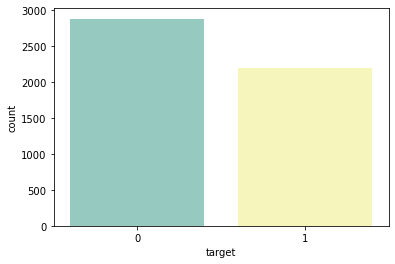

0    2884
1    2196
Name: target, dtype: int64


In [68]:
print ('                With Respect to Train data')

sns.countplot(train['target'], palette="Set3")
plt.show()
print(train['target'].value_counts())

It shows that Training data have 2884 non-disasterious tweets and 2196 disasterious tweets

                                                   Most Used Keywords

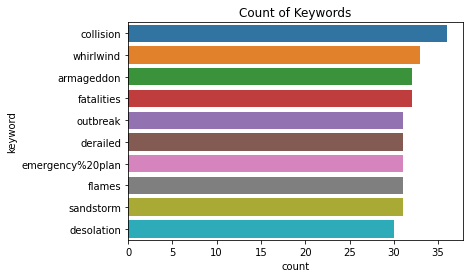

In [69]:

sns.countplot(y = train.keyword,order = train['keyword'].value_counts().sort_values(ascending=False).iloc[0:10].index)
plt.title("Count of Keywords")
plt.show() # It shows the most usage keywords

It shows top 10 keywords used in train data

                                                  Most Used Disasterious Keywords
                                                  
We will identify most used disasterious keywords by finding keywords vs Target

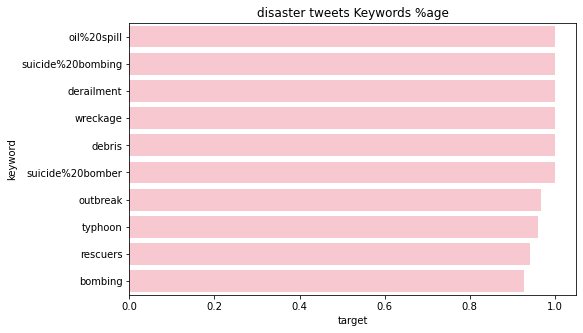

In [70]:
disastered_tweet = train.groupby('keyword')['target'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(disastered_tweet, disastered_tweet.index, color='pink')
plt.title('disaster tweets Keywords %age')
plt.show()

                                                 Least Disasterious Keywords
                                                  
We will identify least used disasterious keywords by finding keywords vs Target

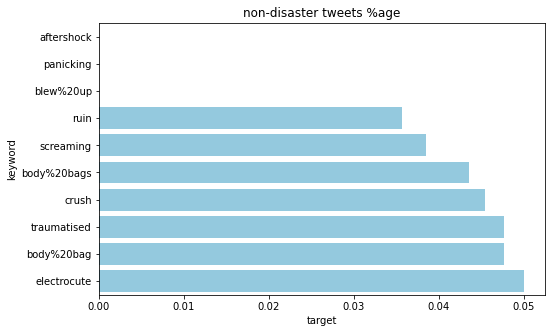

In [71]:
non_disasterd  = train.groupby('keyword')['target'].mean().sort_values().head(10)
plt.figure(figsize=(8,5))
sns.barplot(non_disasterd, non_disasterd.index, color='skyblue')
plt.title('non-disaster tweets %age')
plt.show()     #confused, Need to Understand


# 2. Data Cleaning
Data cleaning is a process of cleaning data by removing unnecessary information, removing duplicate or incorrect inforamtion and to fix the format of dataset. 
Following are the basic steps for data cleaning:<br>
<b>Step 1:</b> Remove duplicate or irrelevant observations<br>
<b>Step 2:</b> Fix structural errors<br>
<b>Step 3:</b> Filter unwanted outliers<br>
<b>Step 4:</b> Handle missing data<br>
<br>
There are multiple techniques to clean the dataset according to the type of dataset. We will be using following: 
1. Regular Expression (RE)
2. Feature Extraction
3. Irrelavant Words (Stopwords)


## 2.1. Regular Expression
For an accurate analysis with texts: characters other than letters that make up words such as blank values, emojies, punctuation marks, numbers will be removed.


In [72]:
import re 

                                         Removing Special Characters from Tweets
In order to see if there are any special characters used in tweets we will check any random tweet.


In [73]:
train['text'].iloc[14]

'Man wife get six years jail for setting ablaze niece\nhttp://t.co/eV1ahOUCZA'

As we can see there are so many special characters have been used above like hypelink, /, \ etc. To remove these all we will split hashtag, Links and tags.

In [74]:
def created_feature(train):
    train['hashtags'] = train['text'].apply(lambda x: " ".join([match.group(0)[1:] for match in re.finditer(r"#\w+", x)]) or 'no_hashtag')
    train['tagged'] = train['text'].apply(lambda x: " ".join([match.group(0)[1:] for match in re.finditer(r"@\w+", x)]) or 'no_tagged')
    train['link'] = train['text'].apply(lambda x:" ".join([match.group(0)[:] for match in re.finditer(r"https?://\S+", x)]) or 'no_link')
    return train

In [75]:
train = created_feature(train)
test = created_feature(test)

In [76]:
train

,id,keyword,location,text,target,hashtags,tagged,link
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,no_hashtag,bbcmtd,http://t.co/lHYXEOHY6C
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,metal RT,no_tagged,http://t.co/YAo1e0xngw
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,AFRICANBAZE,no_tagged,http://t.co/2nndBGwyEi
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,no_hashtag,no_tagged,no_link
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,no_hashtag,no_tagged,http://t.co/qqsmshaJ3N
...,...,...,...,...,...,...,...,...
7575,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0,no_hashtag,no_tagged,http://t.co/uEa0txRHYs
7577,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0,whoops,widda16,no_link
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,no_hashtag,no_tagged,no_link
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,FX forex trading,no_tagged,http://t.co/7enNulLKzM


We can see links, tags and hashtags have been seperated in new columns. Similarly test data can be seen below

In [77]:
test

,id,keyword,location,text,hashtags,tagged,link
15,46,ablaze,London,Birmingham Wholesale Market is ablaze BBC News...,no_hashtag,no_tagged,http://t.co/irWqCEZWEU
16,47,ablaze,Niall's place | SAF 12 SQUAD |,@sunkxssedharry will you wear shorts for race ...,no_hashtag,sunkxssedharry,no_link
17,51,ablaze,NIGERIA,#PreviouslyOnDoyinTv: Toke MakinwaÛªs marriag...,PreviouslyOnDoyinTv,no_tagged,http://t.co/CMghxBa2XI
18,58,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,nsfw,no_tagged,http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 ...
19,60,ablaze,"Los Angeles, Califnordia",PSA: IÛªm splitting my personalities.\n\n?? t...,no_hashtag,ablaze_co ablaze,no_link
...,...,...,...,...,...,...,...
3246,10804,wrecked,Love Reiss,@yakubOObs think he deactivated because his no...,no_hashtag,yakubOObs,no_link
3247,10806,wrecked,Seattle Washington,RT CNBC '3 words from Disney CEO Bob Iger wrec...,no_hashtag,no_tagged,http://t.co/f0texKsqhL http://t.co/ilySLaTMgI'
3248,10807,wrecked,Acey mountain islanddåÇTorontoåÈ,Smackdown tyme this should put me in a good mo...,no_hashtag,no_tagged,no_link
3249,10816,wrecked,los angeles,@thrillhho jsyk I haven't stopped thinking abt...,no_hashtag,thrillhho,no_link


In [78]:
train['hashtags'].value_counts().sort_values(ascending=False).iloc[0:8]

no_hashtag                              3847
hot prebreak best                         25
GBBO                                      10
WX                                         7
Bestnaijamade                              6
News                                       6
Dubstep TrapMusic DnB EDM Dance Ices       6
okwx                                       6
Name: hashtags, dtype: int64

In [79]:
train['link'].value_counts().sort_values(ascending=False).iloc[0:10]

no_link                                                                                        2364
http://t.co/KSAwlYuX02                                                                            6
http://t.co/cybKsXHF7d                                                                            5
https://t.co/moLL5vd8yD                                                                           4
https://t.co/rqWuoy1fm4                                                                           4
http://t.co/cEdCUgEuWs                                                                            3
http://t.co/0wrATkA2jL                                                                            3
http://t.co/BbDpnj8XSx                                                                            3
http://t.co/LwwoJXtTIV                                                                            2
http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS       2


Now we will clean the links and remove breaks from tweets

In [80]:
def clean_text(text):
    text = re.sub(r'https?://\S+', '', text) # remove links
    text = re.sub(r'\n',' ', text) #  remove breaks
    text = re.sub('\s+', ' ', text).strip() 
    return text

Tweet text at 417 row is shown below and as we can see there is a hyperlink in this tweet

In [81]:
train['text'][417]

'Arson suspect linked to 30 fires caught in Northern California http://t.co/mmGsyAHDzb'

Now we will clean this hyperlink

In [82]:
clean_text(train['text'][417])

'Arson suspect linked to 30 fires caught in Northern California'

Now we will apply this cleaning in all data by using lambda

In [83]:
train['text'] = train['text'].apply(lambda x: clean_text(x))
test['text'] = test['text'].apply(lambda x: clean_text(x))

In [84]:
train.head()

,id,keyword,location,text,target,hashtags,tagged,link
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze,1,no_hashtag,bbcmtd,http://t.co/lHYXEOHY6C
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT,0,metal RT,no_tagged,http://t.co/YAo1e0xngw
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,AFRICANBAZE,no_tagged,http://t.co/2nndBGwyEi
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,no_hashtag,no_tagged,no_link
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,no_hashtag,no_tagged,http://t.co/qqsmshaJ3N


As we can see from above results data have been cleaned from hyperlinks.

                                             Convert Text To Lowercase form
We will convert all tweets of both test and train data into lower form in order to prevent any ambiguity and for accurate analysis.


In [85]:

train['text'] = [re.sub("[^a-zA-Z]"," ",text).lower() for text in train['text']]


train.head()

,id,keyword,location,text,target,hashtags,tagged,link
31,48,ablaze,Birmingham,bbcmtd wholesale markets ablaze,1,no_hashtag,bbcmtd,http://t.co/lHYXEOHY6C
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy metal rt,0,metal RT,no_tagged,http://t.co/YAo1e0xngw
33,50,ablaze,AFRICA,africanbaze breaking news nigeria flag set a...,1,AFRICANBAZE,no_tagged,http://t.co/2nndBGwyEi
34,52,ablaze,"Philadelphia, PA",crying out for more set me ablaze,0,no_hashtag,no_tagged,no_link
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0,no_hashtag,no_tagged,http://t.co/qqsmshaJ3N


In [86]:
test['text'] = [re.sub("[^a-zA-Z]"," ",text).lower() for text in test['text']]
test.head()

,id,keyword,location,text,hashtags,tagged,link
15,46,ablaze,London,birmingham wholesale market is ablaze bbc news...,no_hashtag,no_tagged,http://t.co/irWqCEZWEU
16,47,ablaze,Niall's place | SAF 12 SQUAD |,sunkxssedharry will you wear shorts for race ...,no_hashtag,sunkxssedharry,no_link
17,51,ablaze,NIGERIA,previouslyondoyintv toke makinwa s marriag...,PreviouslyOnDoyinTv,no_tagged,http://t.co/CMghxBa2XI
18,58,ablaze,Live On Webcam,check these out nsfw,nsfw,no_tagged,http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 ...
19,60,ablaze,"Los Angeles, Califnordia",psa i m splitting my personalities tech...,no_hashtag,ablaze_co ablaze,no_link


As hahtags tagged and link columns are not needed now so we will remove it from training and testing data

In [87]:
train.drop(['hashtags', 'tagged'], axis=1, inplace=True)

In [88]:
train.drop(['link'], axis=1, inplace=True)

In [90]:
test.drop(['hashtags', 'tagged'], axis=1, inplace=True)

In [91]:
test.drop(['link'], axis=1, inplace=True)

From above results we can see that all hyperlinks, tags, hashtags and special characters have been removed from tweets. 


## 2.2.Feature Extraction
                                     Identify Positive, Negative and neutral Tweets
- We will use textblob library which is helpful in identifing features  like we are intrested in identifying polarity whether the tweets are positive, negative or neutral, it will help us in identifying that.
- We will be using sentiment feature of textblob which is helpful in identifying whether the statement is positive or negative. polarity lies between [1,-1] if it is more towards 1 it will be positive tweet, if it will be more towards zero, it will be a negative tweet.

In [92]:
from textblob import TextBlob


In [102]:

def polarity_check_label(dataframe):
    polarity_list = []
    
    for text in dataframe['text']:
        polarity_point = TextBlob(text).sentiment.polarity
        if polarity_point < 0 : polarity_state= 'Negative'
        elif polarity_point == 0 : polarity_state = 'Neutral'
        else : polarity_state = 'Positive'
        polarity_list.append(polarity_state)
        
    dataframe['polarity_state'] = polarity_list
    
polarity_check_label(train)
polarity_check_label(test)

In [103]:
train.head()

,id,keyword,location,text,target,polarity_state
31,48,ablaze,Birmingham,bbcmtd wholesale market ablaze,1,Neutral
32,49,ablaze,Est. September 2012 - Bristol,always try bring heavy metal rt,0,Negative
33,50,ablaze,AFRICA,africanbaze breaking news nigeria flag set abl...,1,Neutral
34,52,ablaze,"Philadelphia, PA",cry set ablaze,0,Neutral
35,53,ablaze,"London, UK",plus side look sky last night ablaze,0,Neutral


In [104]:
test.head()

,id,keyword,location,text,polarity_state
15,46,ablaze,London,birmingham wholesale market ablaze bbc news fi...,Neutral
16,47,ablaze,Niall's place | SAF 12 SQUAD |,sunkxssedharry wear short race ablaze,Neutral
17,51,ablaze,NIGERIA,previouslyondoyintv toke makinwa marriage cris...,Neutral
18,58,ablaze,Live On Webcam,check nsfw,Neutral
19,60,ablaze,"Los Angeles, Califnordia",psa splitting personality techie follow ablaze...,Neutral


<a id='2.3'></a>
## 2.3. Irrelavant Words (Stopwords)


- For a good analysis, unnecessary words and attachments in sentences should be removed.
- Stopwords in the corpus file downloaded from ntlk contains these words and their attachments.

- **Word_tokenize library is used to separate words in sentences.**



In [105]:
import nltk # natural language tool kit for word_tokenize ...
nltk.download("stopwords")      # stopwords is download in corpus directory
from nltk.corpus import stopwords  # import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
train['text'] = [nltk.word_tokenize(text) for text in train['text']]
test['text'] = [nltk.word_tokenize(text) for text in test['text']]

train.text.head()

31                  [bbcmtd, wholesale, market, ablaze]
32               [always, try, bring, heavy, metal, rt]
33    [africanbaze, breaking, news, nigeria, flag, s...
34                                   [cry, set, ablaze]
35         [plus, side, look, sky, last, night, ablaze]
Name: text, dtype: object

In [107]:
test.text.head()

15    [birmingham, wholesale, market, ablaze, bbc, n...
16          [sunkxssedharry, wear, short, race, ablaze]
17    [previouslyondoyintv, toke, makinwa, marriage,...
18                                        [check, nsfw]
19    [psa, splitting, personality, techie, follow, ...
Name: text, dtype: object

Now we will apply Lemmatization
- Lemma is a method that allows the word to be separated by word roots.
- With the join operation, the words are re-combined into sentences.

In [108]:
def lemma_and_join(dataframe):
    lemma = nltk.WordNetLemmatizer()
    text_list = []
    for text in dataframe['text']:
        text = [ word for word in text if not word in set(stopwords.words("english"))]
        text = [lemma.lemmatize(word) for word in text]
        text = " ".join(text)
        text_list.append(text)
    return text_list

In [109]:
train['text'] = lemma_and_join(train)
test['text'] = lemma_and_join(test)
train.head()

,id,keyword,location,text,target,polarity_state
31,48,ablaze,Birmingham,bbcmtd wholesale market ablaze,1,Neutral
32,49,ablaze,Est. September 2012 - Bristol,always try bring heavy metal rt,0,Negative
33,50,ablaze,AFRICA,africanbaze breaking news nigeria flag set abl...,1,Neutral
34,52,ablaze,"Philadelphia, PA",cry set ablaze,0,Neutral
35,53,ablaze,"London, UK",plus side look sky last night ablaze,0,Neutral


In [110]:
test.head()

,id,keyword,location,text,polarity_state
15,46,ablaze,London,birmingham wholesale market ablaze bbc news fi...,Neutral
16,47,ablaze,Niall's place | SAF 12 SQUAD |,sunkxssedharry wear short race ablaze,Neutral
17,51,ablaze,NIGERIA,previouslyondoyintv toke makinwa marriage cris...,Neutral
18,58,ablaze,Live On Webcam,check nsfw,Neutral
19,60,ablaze,"Los Angeles, Califnordia",psa splitting personality techie follow ablaze...,Neutral


<a id='4'></a>
# 4. Modeling


Now we will apply models for the prediction on above data 

In [111]:
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

- **Models Created**

In [112]:
f1_score_list=[]
train_accuracy_list=[]
test_accuracy_list = []
classifier_list = []
def fit_and_predict(model,x_train,x_test,y_train,y_test):
    
    classifier = model
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    #print('{}'.format(classifier))
    cmatrix = confusion_matrix(y_test,y_pred)
    
    f,ax = plt.subplots(figsize=(3,3))
    sns.heatmap(cmatrix,annot=True,linewidths=0.5,cbar=False,linecolor="red",fmt='.0f',ax=ax)
    plt.xlabel("y_predict")
    plt.ylabel("y_true")
    ax.set(title=str(classifier))
    plt.show()
    
    
    f1score = f1_score(y_test,y_pred,average='weighted')
    train_accuracy = round(classifier.score(x_train,y_train)*100)
    test_accuracy =  round(accuracy_score(y_test,y_pred)*100)
    
    classifier_list.append(str(classifier))
    train_accuracy_list.append(str(train_accuracy))
    test_accuracy_list.append(str(test_accuracy))
    f1_score_list.append(str(round(f1score*100)))
    
    
    print(classification_report(y_test,y_pred))
    print('Accuracy of classifier on training set:{}%'.format(train_accuracy))
    print('-'*50)
    print('Accuracy of classifier on test set:{}%' .format(test_accuracy))
    


    


                                                         Bag of Words
For prediction we will need to convert text into numarical form in order to get accurate prediction for this purpose we will use bag of words.<br>
The word bag model is a way of showing text vectorially while modeling text with machine learning algorithms. In this model, we represent the text as if inside a bag.<br>
For Example: <br>
It was a terrible earthquake<br>
1  0   0     1       1<br>
0  1   0     0       1<br>
0  0   0     1       1<br>

In [126]:
from sklearn.feature_extraction.text import CountVectorizer # used method for create bag of word


count_vectorizer = CountVectorizer() 

sparce_matrix_train= count_vectorizer.fit_transform(train['text'])
space_matrix_test = count_vectorizer.transform(test['text']) 

In [127]:

y = train.target
x = sparce_matrix_train

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)

In [128]:
random_state = 15
models=[
        LogisticRegression(random_state=15),
        DecisionTreeClassifier(random_state = 15),
        KNeighborsClassifier(),
        RandomForestClassifier(random_state=15),
       ]

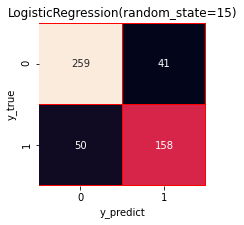

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       300
           1       0.79      0.76      0.78       208

    accuracy                           0.82       508
   macro avg       0.82      0.81      0.81       508
weighted avg       0.82      0.82      0.82       508

Accuracy of classifier on training set:96%
--------------------------------------------------
Accuracy of classifier on test set:82%


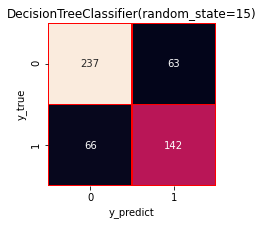

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       300
           1       0.69      0.68      0.69       208

    accuracy                           0.75       508
   macro avg       0.74      0.74      0.74       508
weighted avg       0.75      0.75      0.75       508

Accuracy of classifier on training set:99%
--------------------------------------------------
Accuracy of classifier on test set:75%


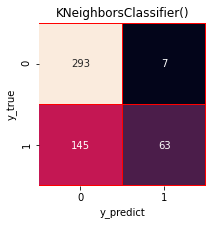

              precision    recall  f1-score   support

           0       0.67      0.98      0.79       300
           1       0.90      0.30      0.45       208

    accuracy                           0.70       508
   macro avg       0.78      0.64      0.62       508
weighted avg       0.76      0.70      0.65       508

Accuracy of classifier on training set:73%
--------------------------------------------------
Accuracy of classifier on test set:70%


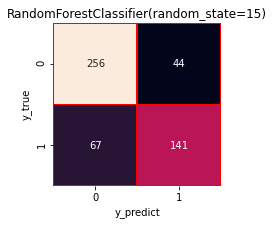

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       300
           1       0.76      0.68      0.72       208

    accuracy                           0.78       508
   macro avg       0.78      0.77      0.77       508
weighted avg       0.78      0.78      0.78       508

Accuracy of classifier on training set:99%
--------------------------------------------------
Accuracy of classifier on test set:78%


In [129]:
for model in models:
    fit_and_predict(model,x_train,x_test,y_train,y_test)


# 5. Conclusion

**Classification have been completed. Results Listed and Compared**

In [119]:
results_dict={'Classifier':classifier_list,
              'Train_Accuracy':train_accuracy_list,
              'Test_Accuracy':test_accuracy_list,
              'F1-Score':f1_score_list
            }

results=pd.DataFrame(results_dict)
results

,Classifier,Train_Accuracy,Test_Accuracy,F1-Score
0,LogisticRegression(random_state=15),96,82,82
1,DecisionTreeClassifier(random_state=15),99,75,75
2,KNeighborsClassifier(),73,70,65
3,RandomForestClassifier(random_state=15),99,78,78
